In [1]:
#import pandas
import pandas as pd

In [3]:
X_train = pd.read_csv("train/X_train.csv")
X_test = pd.read_csv("test/X_test.csv")
y_train = pd.read_csv("train/y_train.csv")
y_test = pd.read_csv("test/y_test.csv")

In [5]:
#--------------DECISION TREE CLASSIFIER----------------------#

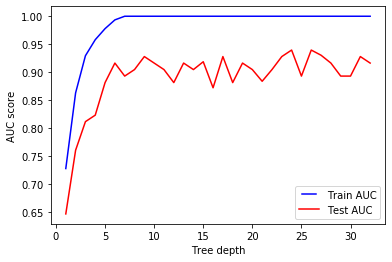

In [6]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

accuracy: 0.9403973509933775
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        90
           1       0.98      0.87      0.92        61

    accuracy                           0.94       151
   macro avg       0.95      0.93      0.94       151
weighted avg       0.94      0.94      0.94       151

Confusion matrix, without normalization
[[89  1]
 [ 8 53]]
Normalized confusion matrix
[[0.98888889 0.01111111]
 [0.13114754 0.86885246]]


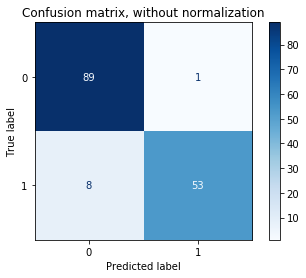

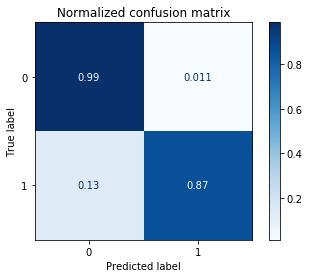

In [5]:
dtc = DecisionTreeClassifier(max_depth=11)
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

class_names = [0,1]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dtc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()